In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from yahoofinancials import YahooFinancials
import json
import datetime
from scipy.signal import argrelextrema
from statsmodels.nonparametric.kernel_regression import KernelReg
from collections import defaultdict

In [103]:
from datetime import date
today = date.today()
today2 = str(today)
print("Today's date:", today2)

Today's date: 2023-11-12


In [104]:
ticker = 'AAPL'
yahoo_financials = YahooFinancials (ticker)
historical_stock_prices = yahoo_financials.get_historical_price_data('2020-01-01', today2, 'daily')

In [105]:
aapl = pd.DataFrame(historical_stock_prices['AAPL']['prices'])
#aapl = aapl.drop('date', axis=1).set_index('formatted_date')
aapl = aapl.drop('date',axis=1)
aapl.rename(columns={"formatted_date": "date"}, inplace = True)
aapl['date']=pd.to_datetime(aapl['date'])
aapl2 = aapl
aapl = aapl.drop(columns=['open','high','low','adjclose','volume'])

aapl.head(5)

,close,date
0,75.087502,2020-01-02
1,74.357498,2020-01-03
2,74.949997,2020-01-06
3,74.597504,2020-01-07
4,75.797501,2020-01-08


In [107]:
print(len(aapl))
print(aapl.shape[0])
print(aapl2.shape[0])


973
973
973


In [108]:
## cambio de nombre de las columnas
#col = ['datetime','open','high','low','close','adj close','volumen']
appl_hor.rename(columns={'Datetime':'datetime','Open':'open','High':'high','Low':'low','Close':'close','Adj Close':'adj close','Volume':'volume'}, inplace = True)
#minima2.rename(columns={"close": "close_min"}, inplace = True)

In [109]:
appl_hor

,open,high,low,close,adj close,volume
Datetime,,,,,,
2021-11-12 09:30:00,148.429993,148.500000,147.488998,148.250000,148.250000,13360648
2021-11-12 10:30:00,148.259995,150.054993,148.119995,149.945007,149.945007,11491903
2021-11-12 11:30:00,149.949997,150.089996,149.610001,149.790100,149.790100,6730847
2021-11-12 12:30:00,149.789993,149.830002,149.292007,149.690002,149.690002,7214990
2021-11-12 13:30:00,149.699997,150.029999,149.675003,149.759995,149.759995,5403938
...,...,...,...,...,...,...
2023-11-08 11:30:00,182.149994,182.500000,181.589996,181.889999,181.889999,5030995
2023-11-08 12:30:00,181.899994,182.580002,181.740005,182.509995,182.509995,4014911
2023-11-08 13:30:00,182.509995,182.889999,182.460007,182.774994,182.774994,3100003


In [110]:
local_max = argrelextrema(aapl['close'].values, np.greater)[0]
local_min = argrelextrema(aapl['close'].values, np.less)[0]
print(local_max)
print(local_min)

[  2   7  11  14  18  24  26  28  30  32  37  40  42  46  49  51  56  58
  60  63  65  70  72  76  79  82  89  92  94  96  98 101 105 110 114 116
 119 121 124 127 131 134 137 139 142 150 152 155 162 164 168 171 173 177
 182 186 189 191 193 196 198 202 207 209 214 218 221 224 232 236 238 241
 243 246 249 254 257 260 268 273 275 277 281 285 291 295 297 299 302 306
 311 319 321 323 325 327 330 335 339 344 348 350 356 361 364 367 370 380
 382 385 389 393 397 399 401 408 413 418 423 427 429 436 439 441 445 455
 458 460 464 466 468 479 482 488 490 493 500 502 505 512 514 524 526 531
 535 543 545 550 564 568 571 575 578 582 585 589 591 593 596 598 602 606
 609 612 618 621 627 633 635 638 642 648 651 656 659 661 667 672 675 678
 680 684 689 695 698 701 705 709 712 719 722 724 727 730 735 740 743 749
 755 757 762 765 770 773 778 780 784 786 791 793 798 800 806 809 812 818
 821 825 829 832 836 841 845 851 857 860 866 869 871 873 879 882 889 891
 896 899 905 909 916 924 928 931 934 938 943 948 95

In [111]:
highs = aapl.iloc[local_max,:]
lows = aapl.iloc[local_min,:]

print(highs)
print(lows)

          close       date
2     74.949997 2020-01-06
7     79.239998 2020-01-13
11    79.682503 2020-01-17
14    79.807503 2020-01-23
18    81.084999 2020-01-29
..          ...        ...
948  178.990005 2023-10-09
951  180.710007 2023-10-12
959  173.440002 2023-10-24
966  177.570007 2023-11-02
970  182.889999 2023-11-08

[250 rows x 2 columns]
          close       date
1     74.357498 2020-01-03
3     74.597504 2020-01-07
9     77.834999 2020-01-15
12    79.142502 2020-01-21
16    77.237503 2020-01-27
..          ...        ...
949  178.389999 2023-10-10
957  172.880005 2023-10-20
961  166.889999 2023-10-26
967  176.649994 2023-11-03
971  182.410004 2023-11-09

[250 rows x 2 columns]


<class 'pandas.core.frame.DataFrame'>
          close       date
1     74.357498 2020-01-03
2     74.949997 2020-01-06
3     74.597504 2020-01-07
7     79.239998 2020-01-13
9     77.834999 2020-01-15
..          ...        ...
961  166.889999 2023-10-26
966  177.570007 2023-11-02
967  176.649994 2023-11-03
970  182.889999 2023-11-08
971  182.410004 2023-11-09

[500 rows x 2 columns]


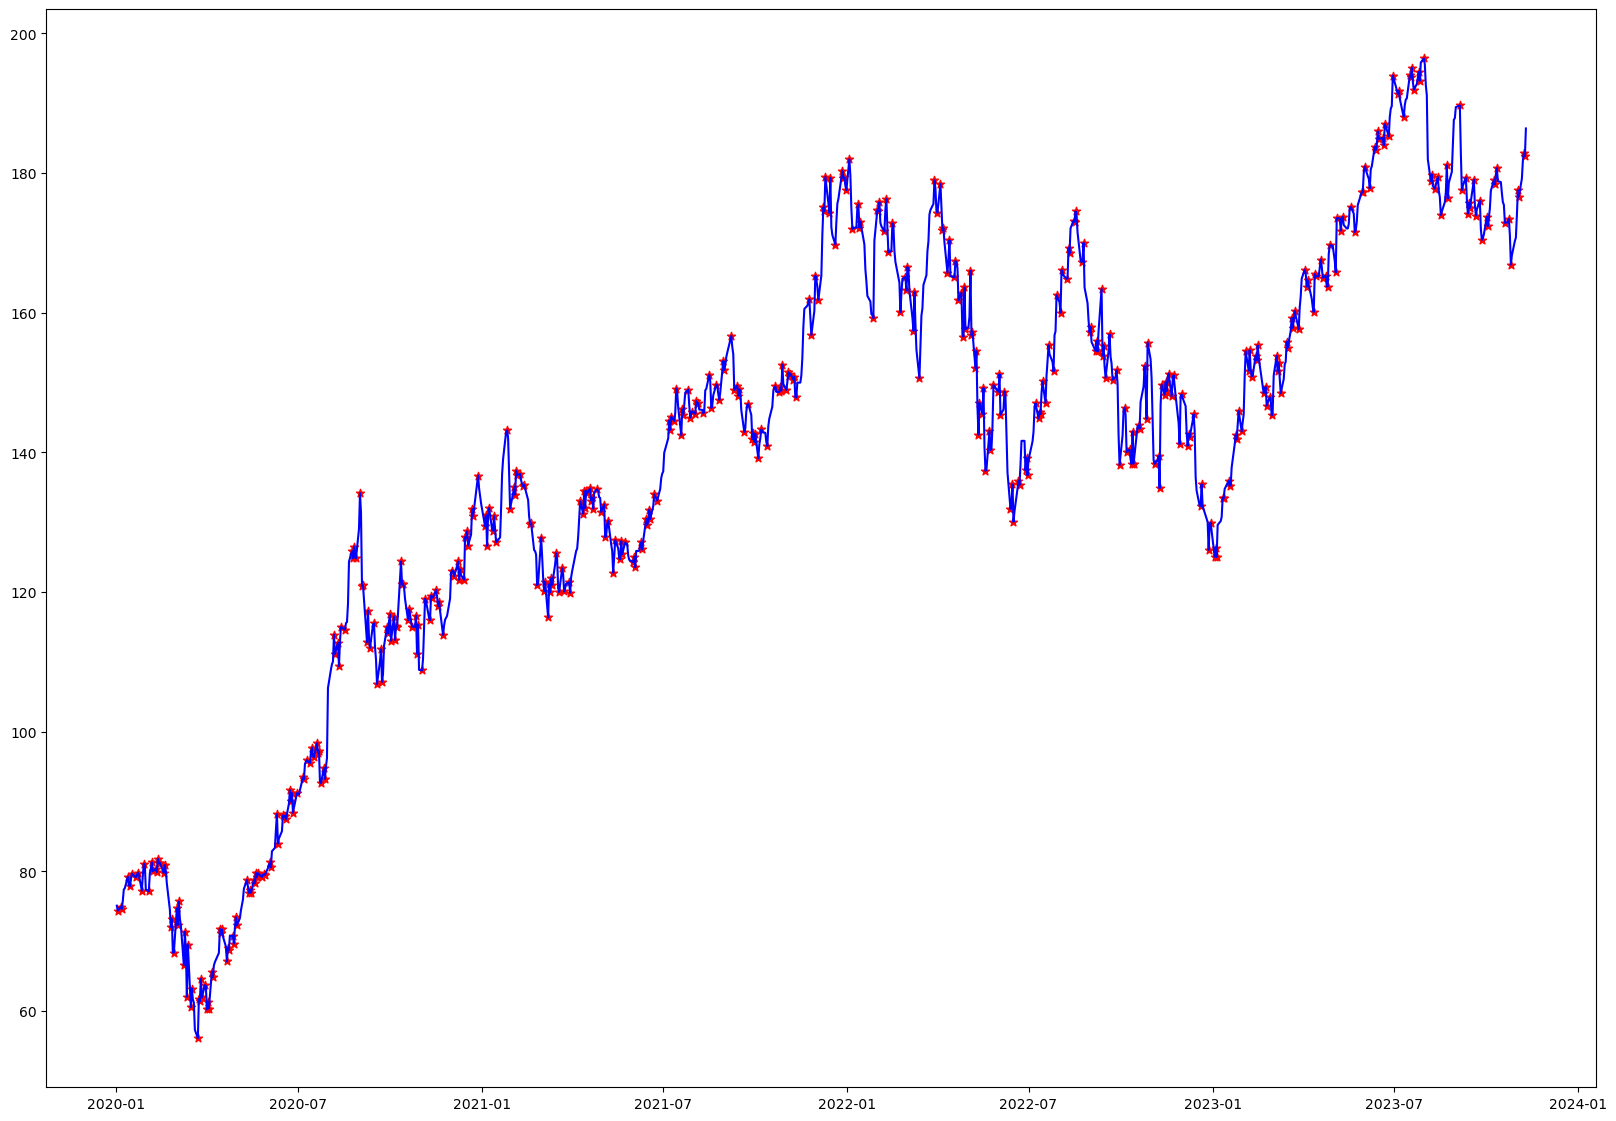

In [112]:
fig = plt.figure(figsize=[20,14])
highslows = pd.concat([highs,lows])

print (type(highslows))
#print (highslows)

#plt.subplot(121)
#plt.plot(highslows, color='green', label = 'close')
highslows_sorted = highslows.sort_values('date')

print (highslows_sorted)
#plt.subplot(122)
plt.plot(aapl['date'],aapl['close'], color='blue', label = 'close')
plt.scatter(highslows_sorted['date'],highslows_sorted['close'], color='red', marker = '*')

# plt.plot(highslows, label = 'puntos')


In [113]:
def find_extrema(s, bw='cv_ls'):
    """
    Input:
        s: prices as pd.series
        bw: bandwith as str or array like
    Returns:
        prices: with 0-based index as pd.series
        extrema: extrema of prices as pd.series
        smoothed_prices: smoothed prices using kernel regression as pd.series
        smoothed_extrema: extrema of smoothed_prices as pd.series
    """
    # Copy series so we can replace index and perform non-parametric
    # kernel regression.
    prices = s.copy()
    #prices = prices.reset_index()
    
    prices.columns = ['close', 'date2']
    
    #prices.columns = ['date', 'close', 'date2']
    prices = prices['close']
    
    #prices = s.copy()
    #prices.columns = ['date', 'price']
    #prices = pd.DataFrame(s)
    #prices = prices['close']
    
    #print(type(prices))
    #print("===============")
    #print(prices)
    #print("===============")
    #print(prices.index)

    kr = KernelReg(
        [prices.values],
        [prices.index.to_numpy()],
        var_type='c', bw=bw
    )
    f = kr.fit([prices.index.values])

    # Use smoothed prices to determine local minima and maxima
    smooth_prices = pd.Series(data=f[0], index=prices.index)
    smooth_local_max = argrelextrema(smooth_prices.values, np.greater)[0]
    smooth_local_min = argrelextrema(smooth_prices.values, np.less)[0]
    local_max_min = np.sort(
        np.concatenate([smooth_local_max, smooth_local_min]))
    smooth_extrema = smooth_prices.loc[local_max_min]

    # Iterate over extrema arrays returning datetime of passed
    # prices array. Uses idxmax and idxmin to window for local extrema.
    price_local_max_dt = []
    for i in smooth_local_max:
        if (i > 1) and (i < len(prices)-1):
            price_local_max_dt.append(prices.iloc[i-2:i+2].idxmax())

    price_local_min_dt = []
    for i in smooth_local_min:
        if (i > 1) and (i < len(prices)-1):
            price_local_min_dt.append(prices.iloc[i-2:i+2].idxmin())

    maxima = pd.Series(prices.loc[price_local_max_dt])
    minima = pd.Series(prices.loc[price_local_min_dt])
    extrema = pd.concat([maxima, minima]).sort_index()
  

    # Return series for each with bar as index
    return extrema, prices, smooth_extrema, smooth_prices, maxima, minima


def find_patterns(extrema, max_bars=35):
    """
    Input:
        extrema: extrema as pd.series with bar number as index
        max_bars: max bars for pattern to play out
    Returns:
        patterns: patterns as a defaultdict list of tuples
        containing the start and end bar of the pattern
    """
    patterns = defaultdict(list)

    # Need to start at five extrema for pattern generation
    for i in range(5, len(extrema)):
        window = extrema.iloc[i-5:i]

        # A pattern must play out within max_bars (default 35)
        if (window.index[-1] - window.index[0]) > max_bars:
            continue

        # Using the notation from the paper to avoid mistakes
        e1 = window.iloc[0]
        e2 = window.iloc[1]
        e3 = window.iloc[2]
        e4 = window.iloc[3]
        e5 = window.iloc[4]

        rtop_g1 = np.mean([e1, e3, e5])
        rtop_g2 = np.mean([e2, e4])
        # Head and Shoulders
        if (e1 > e2) and (e3 > e1) and (e3 > e5) and \
                (abs(e1 - e5) <= 0.03*np.mean([e1, e5])) and \
                (abs(e2 - e4) <= 0.03*np.mean([e1, e5])):
            patterns['HS'].append((window.index[0], window.index[-1]))

        # Inverse Head and Shoulders
        elif (e1 < e2) and (e3 < e1) and (e3 < e5) and \
                (abs(e1 - e5) <= 0.03*np.mean([e1, e5])) and \
                (abs(e2 - e4) <= 0.03*np.mean([e1, e5])):
            patterns['IHS'].append((window.index[0], window.index[-1]))

        # Broadening Top
        elif (e1 > e2) and (e1 < e3) and (e3 < e5) and (e2 > e4):
            patterns['BTOP'].append((window.index[0], window.index[-1]))

        # Broadening Bottom
        elif (e1 < e2) and (e1 > e3) and (e3 > e5) and (e2 < e4):
            patterns['BBOT'].append((window.index[0], window.index[-1]))

        # Triangle Top
        elif (e1 > e2) and (e1 > e3) and (e3 > e5) and (e2 < e4):
            patterns['TTOP'].append((window.index[0], window.index[-1]))

        # Triangle Bottom
        elif (e1 < e2) and (e1 < e3) and (e3 < e5) and (e2 > e4):
            patterns['TBOT'].append((window.index[0], window.index[-1]))

        # Rectangle Top
        elif (e1 > e2) and \
                (abs(e1-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e3-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e5-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e2-rtop_g2)/rtop_g2 < 0.0075) and \
                (abs(e4-rtop_g2)/rtop_g2 < 0.0075) and \
                (min(e1, e3, e5) > max(e2, e4)):

            patterns['RTOP'].append((window.index[0], window.index[-1]))

        # Rectangle Bottom
        elif (e1 < e2) and \
                (abs(e1-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e3-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e5-rtop_g1)/rtop_g1 < 0.0075) and \
                (abs(e2-rtop_g2)/rtop_g2 < 0.0075) and \
                (abs(e4-rtop_g2)/rtop_g2 < 0.0075) and \
                (max(e1, e3, e5) > min(e2, e4)):

            patterns['RBOT'].append((window.index[0], window.index[-1]))

    return patterns


def plot_window(prices, extrema, smooth_prices, smooth_extrema, ax=None):
    """
    Input: data from find_extrema
    Output: plots window for actual and smoothed prices and extrema
    """
    
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    prices.plot(ax=ax, color='dodgerblue')
    ax.scatter(extrema.index, extrema.values, color='red')
    #ax.scatter(maxima.index, maxima.values, color='red')
    #ax.scatter(minima.index, minima.values, color='black')
    smooth_prices.plot(ax=ax, color='lightgrey')
    ax.scatter(smooth_extrema.index, smooth_extrema.values, color='lightgrey')
    

RTOP: 8 occurences
[(0, 4), (96, 100), (319, 323), (325, 329), (380, 384), (722, 726), (869, 873), (929, 933)]
TBOT: 42 occurences
[(6, 10), (10, 14), (45, 49), (57, 61), (77, 81), (81, 85), (99, 103), (103, 107), (123, 127), (129, 133), (154, 158), (163, 167), (172, 176), (190, 194), (217, 221), (231, 235), (237, 241), (271, 275), (309, 313), (347, 351), (359, 363), (363, 367), (395, 399), (417, 421), (459, 463), (489, 493), (541, 545), (584, 588), (601, 605), (605, 609), (636, 640), (647, 651), (700, 704), (703, 707), (717, 721), (764, 768), (808, 812), (824, 828), (840, 844), (872, 876), (894, 898), (942, 946)]
IHS: 39 occurences
[(25, 29), (29, 33), (97, 101), (100, 104), (120, 124), (130, 134), (133, 137), (188, 192), (235, 239), (253, 257), (256, 260), (272, 276), (294, 298), (310, 314), (326, 330), (355, 359), (360, 364), (396, 400), (426, 430), (440, 444), (454, 458), (467, 471), (478, 482), (501, 505), (542, 546), (617, 621), (626, 630), (632, 636), (671, 675), (679, 683), (69

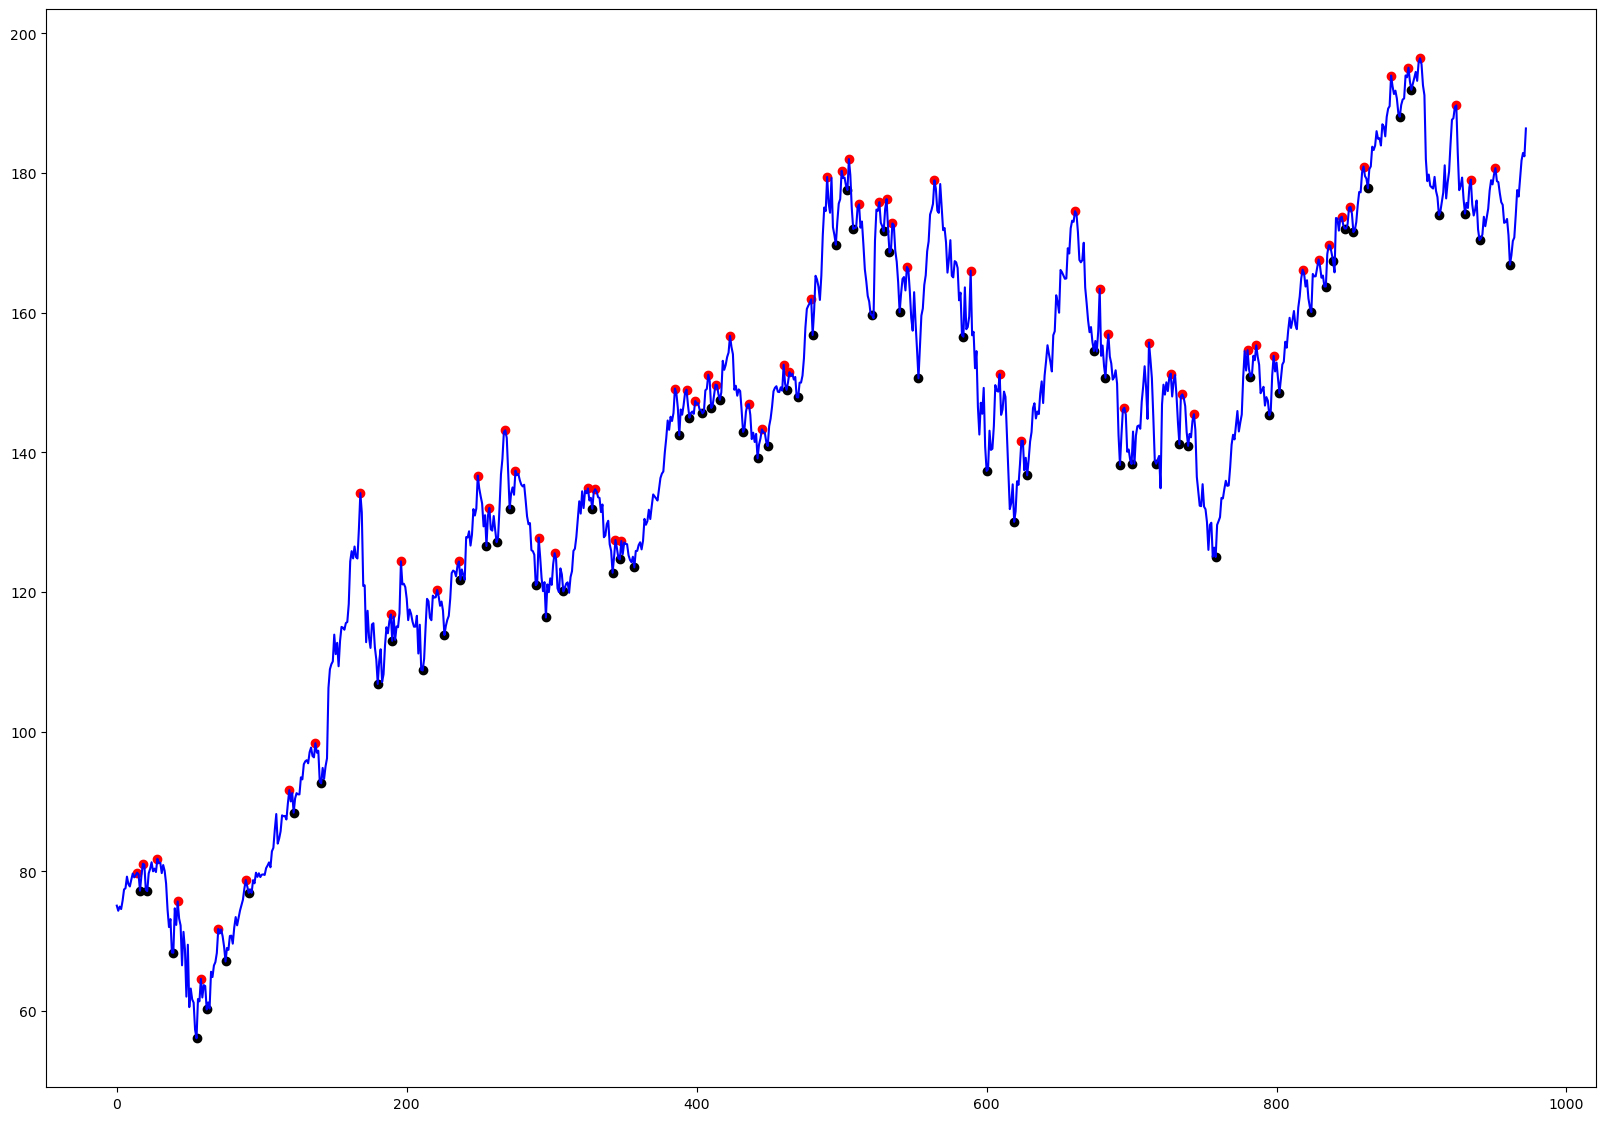

In [114]:
extrema, prices, smooth_extrema, smooth_prices, maxima, minima = find_extrema(aapl, bw=[1.5])

patterns = find_patterns(prices)

#print(prices)

for name, pattern_periods in patterns.items():
    print(f"{name}: {len(pattern_periods)} occurences")
    print(pattern_periods)
    

#plot_window (prices, extrema, smooth_prices, smooth_extrema, ax=None)

fig = plt.figure(figsize=[20,14])
ax = fig.add_subplot(111)
#plt.subplot(121)
#plt.plot(highslows, color='green', label = 'close')


#plt.subplot(122)
plt.plot(prices, color='blue', label = 'close')
#ax.scatter(extrema.index, extrema.values, color='red')
ax.scatter(maxima.index, maxima.values, color='red')
ax.scatter(minima.index, minima.values, color='black')
#plt.scatter(highslows_sorted['date'],highslows_sorted['close'], color='red', marker = '*')



In [115]:
aapl2

,high,low,open,close,volume,adjclose,date
0,75.150002,73.797501,74.059998,75.087502,135480400,73.152641,2020-01-02
1,75.144997,74.125000,74.287498,74.357498,146322800,72.441444,2020-01-03
2,74.989998,73.187500,73.447502,74.949997,118387200,73.018692,2020-01-06
3,75.224998,74.370003,74.959999,74.597504,108872000,72.675278,2020-01-07
4,76.110001,74.290001,74.290001,75.797501,132079200,73.844345,2020-01-08
...,...,...,...,...,...,...,...
968,179.429993,176.210007,176.380005,179.229996,63841300,178.994186,2023-11-06
969,182.440002,178.970001,179.179993,181.820007,70530000,181.580780,2023-11-07
970,183.449997,181.589996,182.350006,182.889999,49340300,182.649368,2023-11-08
971,184.119995,181.809998,182.960007,182.410004,53763500,182.169998,2023-11-09


In [116]:
minima2 = minima.to_frame()
minima2.rename(columns={"close": "close_min"}, inplace = True)

maxima2 = maxima.to_frame()
maxima2.rename(columns={"close": "close_max"}, inplace = True)

In [117]:
appl2 = pd.concat([aapl2, minima2], join = 'outer', axis=1)

In [118]:
appl2 = pd.concat([appl2, maxima2], join = 'outer', axis=1)

In [119]:
appl2['SMA20'] = appl2['close'].rolling(20).mean()
appl2.dropna(inplace=False)

appl2['SMA40'] = appl2['close'].rolling(40).mean()
appl2.dropna(inplace=False)

appl2['SMA100'] = appl2['close'].rolling(100).mean()
appl2.dropna(inplace=False)

appl2['SMA200'] = appl2['close'].rolling(200).mean()
appl2.dropna(inplace=False)

,high,low,open,close,volume,adjclose,date,close_min,close_max,SMA20,SMA40,SMA100,SMA200


In [120]:
appl2["pga01"] = appl2["close_min"]

In [121]:
print(appl2.shape[0])

973


In [69]:
#pga02
def pga02(appl2):
    if appl2['close_min'] - appl2['SMA100']<=2 or appl2['close_min'] - appl2['SMA200']<=2 or appl2['close_min']<appl2['SMA100'] or appl2['close_min']<appl2['SMA200']:
        return 1
    else:
        return 0
appl2['pga02'] = appl2.apply(pga02, axis=1)

# printing Dataframe


In [77]:
#appl_pga = appl2[['date','open','close','pga02']].query('pga02 == 1 and open<=close')
appl_pga = appl2[['date','close','pga01','pga02']].query('pga02 == 1')

In [78]:
appl_pga = appl_pga.reset_index()
appl_pga['id_posiblegpa'] = appl_pga.index+1
appl_pga.drop(columns='index')

,date,close,pga01,pga02,id_posiblegpa
0,2020-11-02,108.769997,108.769997,1,1
1,2020-11-23,113.849998,113.849998,1,2
2,2021-02-25,120.989998,120.989998,1,3
3,2021-03-08,116.360001,116.360001,1,4
4,2021-03-24,120.089996,120.089996,1,5
5,2021-05-12,122.769997,122.769997,1,6
6,2021-05-19,124.690002,124.690002,1,7
7,2021-06-03,123.540001,123.540001,1,8
8,2021-10-04,139.139999,139.139999,1,9
9,2021-10-13,140.910004,140.910004,1,10


In [81]:
# =====Se identifica los dias siguientes que cerro con vela verde======
id_new = 1
appl_pga2 = appl2[['date','open', 'close']].query('open<=close and 1<0')  

for i in appl_pga.index:
    print("index:",i, "fecha:", appl_pga['date'][i])
    j=0
    fec_today = appl_pga['date'][i]
    fec_tomorrow = fec_today + pd.DateOffset(days=1)
    while j<=0:              
        if fec_tomorrow.date()<= today:
            j=0
        else:
            j=1
            
        #1 verificar si existe el dia
        tupla_new1 = appl2[['date','open', 'close']].query('date == @fec_tomorrow')
        if len(tupla_new1.index)>0:
            #2 revisamos si el dia fue vela alcista
            tupla_new2 = appl2[['date','open', 'close']].query('date == @fec_tomorrow and open<=close')    
            tupla_new2['id_posiblegpa']=id_new
            tupla_new2['id_ultdia']=0
            if len(tupla_new2.index)>0:
                if len(appl_pga2.index)==0:                    
                    appl_pga2 = tupla_new2
                else:
                    #appl_pga2 = appl_pga2.append(tupla_new2)
                    #appl_pga2 = pd.concat([appl_pga2, pd.DataFrame([tupla_new2])], ignore_index=True)
                    #appl_pga2.loc[len(appl_pga2)] = tupla_new2
                    appl_pga2 = pd.concat([appl_pga2, tupla_new2],ignore_index=True)                    
                fec_tomorrow = fec_tomorrow + pd.DateOffset(days=1)
                
            else:                
                #Se agrega el dia en que se perdio la subida (ultimo dia)
                tupla_new2 = appl2[['date','open', 'close']].query('date == @fec_tomorrow')
                tupla_new2['id_posiblegpa'] = id_new
                tupla_new2['id_ultdia']=1
                appl_pga2 = pd.concat([appl_pga2, tupla_new2],ignore_index=True) 
                j=1
                id_new+= int(1)
        else:         
            fec_tomorrow = fec_tomorrow + pd.DateOffset(days=1)


index: 0 fecha: 2020-11-02 00:00:00
index: 1 fecha: 2020-11-23 00:00:00
index: 2 fecha: 2021-02-25 00:00:00
index: 3 fecha: 2021-03-08 00:00:00
index: 4 fecha: 2021-03-24 00:00:00
index: 5 fecha: 2021-05-12 00:00:00
index: 6 fecha: 2021-05-19 00:00:00
index: 7 fecha: 2021-06-03 00:00:00
index: 8 fecha: 2021-10-04 00:00:00
index: 9 fecha: 2021-10-13 00:00:00
index: 10 fecha: 2021-11-11 00:00:00
index: 11 fecha: 2022-01-26 00:00:00
index: 12 fecha: 2022-02-23 00:00:00
index: 13 fecha: 2022-03-14 00:00:00
index: 14 fecha: 2022-04-27 00:00:00
index: 15 fecha: 2022-05-19 00:00:00
index: 16 fecha: 2022-06-16 00:00:00
index: 17 fecha: 2022-06-30 00:00:00
index: 18 fecha: 2022-09-06 00:00:00
index: 19 fecha: 2022-09-16 00:00:00
index: 20 fecha: 2022-09-30 00:00:00
index: 21 fecha: 2022-10-12 00:00:00
index: 22 fecha: 2022-11-04 00:00:00
index: 23 fecha: 2022-11-29 00:00:00
index: 24 fecha: 2022-12-07 00:00:00
index: 25 fecha: 2023-01-05 00:00:00
index: 26 fecha: 2023-03-01 00:00:00
index: 27 f

In [28]:
appl_pga2.head(50)

,date,open,close,id_posiblegpa,id_ultdia
0,2020-11-03,109.660004,110.440002,1,0
1,2020-11-04,114.139999,114.949997,1,0
2,2020-11-05,117.949997,119.029999,1,0
3,2020-11-06,118.320000,118.690002,1,0
4,2020-11-09,120.500000,116.320000,1,1
5,2020-11-24,113.910004,115.169998,2,0
6,2020-11-25,115.550003,116.029999,2,0
7,2020-11-27,116.570000,116.589996,2,0
8,2020-11-30,116.970001,119.050003,2,0
9,2020-12-01,121.010002,122.720001,2,0


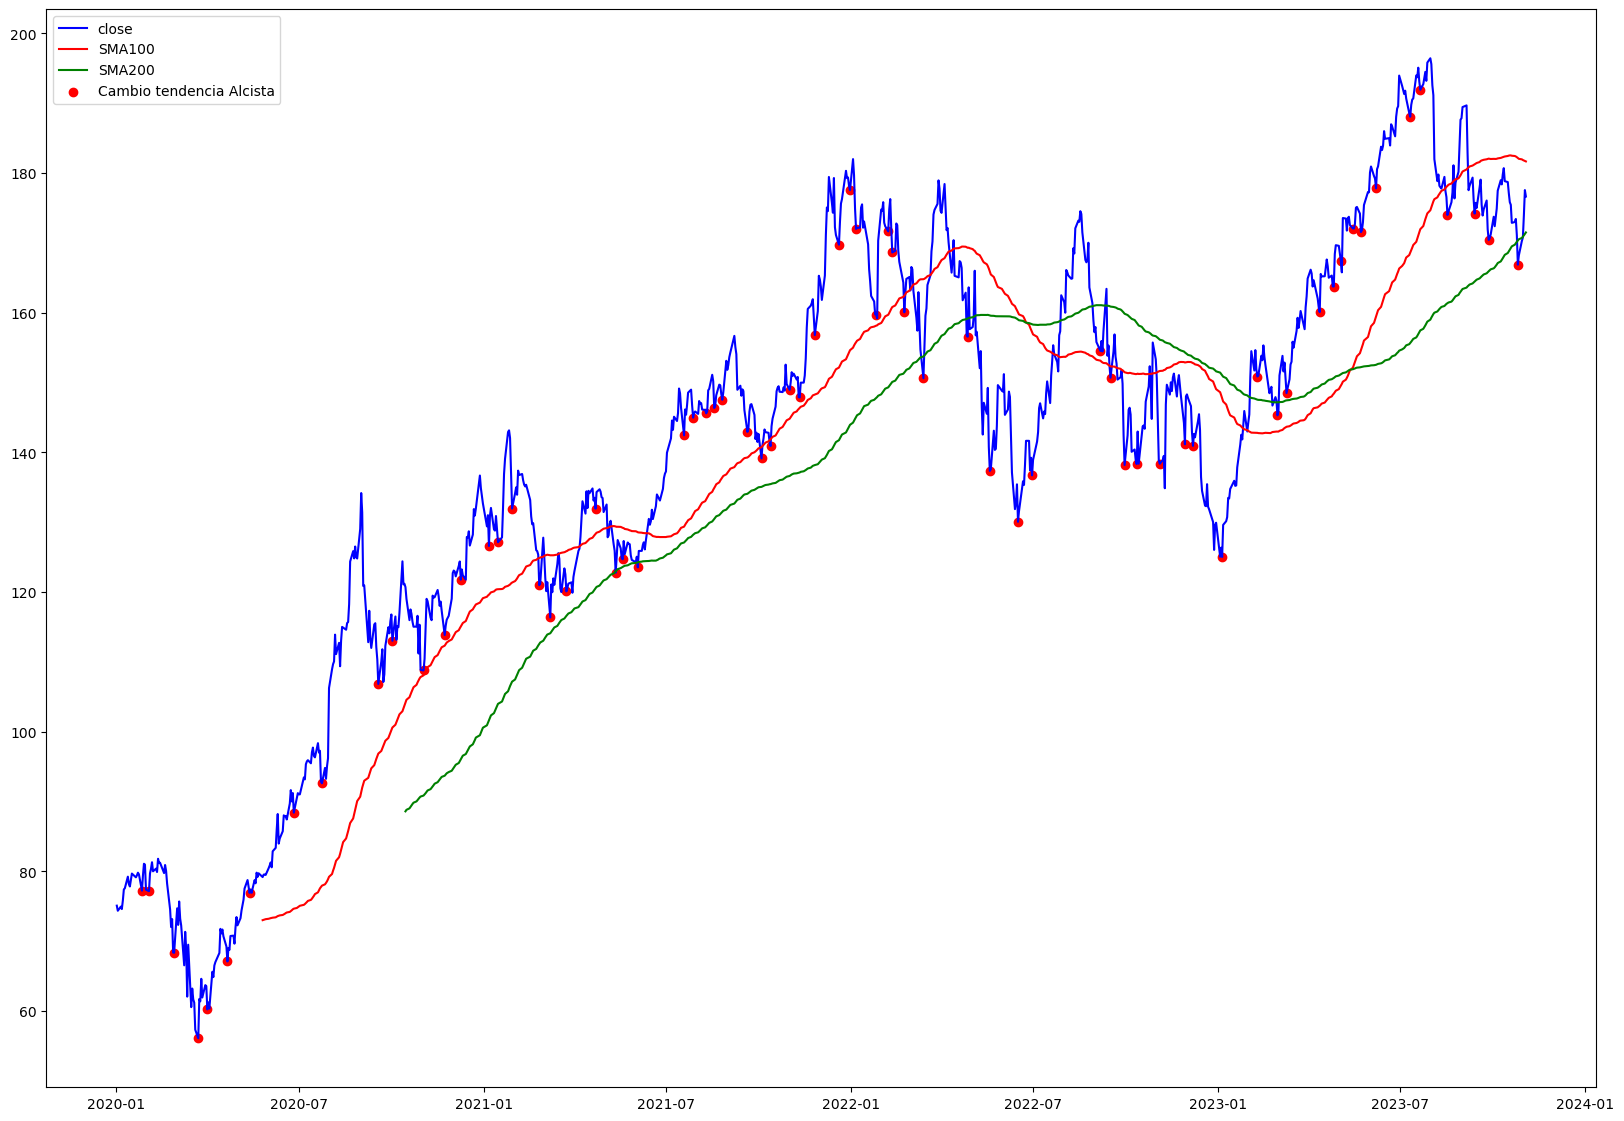

In [29]:
fig = plt.figure(figsize=[20,14])
ax = fig.add_subplot(111)
#plt.subplot(121)
#plt.plot(highslows, color='green', label = 'close')


#plt.subplot(122)
plt.plot(appl2['date'], appl2['close'], color='blue', label = 'close')
plt.plot(appl2['date'], appl2['SMA100'], color='red', label = 'SMA100')
plt.plot(appl2['date'], appl2['SMA200'], color='green', label = 'SMA200')
ax.scatter(appl2['date'], appl2['close_min'], color='red', label = 'Cambio tendencia Alcista')
plt.legend(loc="upper left")


In [30]:
appl_hor['date'] = pd.to_datetime (appl_hor.index.date)
appl_hor['datetime'] = pd.to_datetime (appl_hor.index)

appl_hor


,open,high,low,close,adj close,volume,date,datetime
Datetime,,,,,,,,
2021-11-08 09:30:00,151.410004,151.570007,150.735001,151.020004,151.020004,23215094,2021-11-08,2021-11-08 09:30:00
2021-11-08 10:30:00,151.020004,151.089996,150.514999,150.668503,150.668503,6183905,2021-11-08,2021-11-08 10:30:00
2021-11-08 11:30:00,150.660004,150.699997,150.160004,150.449997,150.449997,5397628,2021-11-08,2021-11-08 11:30:00
2021-11-08 12:30:00,150.445007,151.009995,150.339996,150.880005,150.880005,3619212,2021-11-08,2021-11-08 12:30:00
2021-11-08 13:30:00,150.880005,150.949997,150.520004,150.524994,150.524994,3291819,2021-11-08,2021-11-08 13:30:00
...,...,...,...,...,...,...,...,...
2023-11-03 11:30:00,174.800003,176.490005,174.600006,176.339996,176.339996,7570993,2023-11-03,2023-11-03 11:30:00
2023-11-03 12:30:00,176.350006,176.449997,175.710007,175.767899,175.767899,5533801,2023-11-03,2023-11-03 12:30:00
2023-11-03 13:30:00,175.761703,175.889999,175.070007,175.789902,175.789902,6023082,2023-11-03,2023-11-03 13:30:00


In [31]:
appl2.dtypes
#appl2.describe().transpose()
#appl2.columns

high                float64
low                 float64
open                float64
close               float64
volume                int64
adjclose            float64
date         datetime64[ns]
close_min           float64
close_max           float64
SMA20               float64
SMA40               float64
SMA100              float64
SMA200              float64
pga01               float64
pga02                 int64
dtype: object

In [32]:
#agregamos columna de id_posiblegpa y id_ultdia que determina los dias de subida
appl_hor2 = pd.merge(appl_hor[['open','close', 'datetime','date']], appl_pga2[['date','id_posiblegpa', 'id_ultdia']], on = 'date', how='left')

In [33]:
appl_hor2.query('id_posiblegpa==11')
#appl_hor2.groupby('id_posiblegpa').count()
#appl_hor2['RN'] = appl_hor2.sort_values(['datetime'], ascending=[True]).groupby(['id_posiblegpa','date']).cumcount() + 1
#appl_hor2.query('id_posiblegpa==11')

#appl_hor2.dtypes

,open,close,datetime,date,id_posiblegpa,id_ultdia
28,148.429993,148.250000,2021-11-12 09:30:00,2021-11-12,11.0,0.0
29,148.259995,149.945007,2021-11-12 10:30:00,2021-11-12,11.0,0.0
30,149.949997,149.790100,2021-11-12 11:30:00,2021-11-12,11.0,0.0
31,149.789993,149.690002,2021-11-12 12:30:00,2021-11-12,11.0,0.0
32,149.699997,149.759995,2021-11-12 13:30:00,2021-11-12,11.0,0.0
33,149.759995,150.175003,2021-11-12 14:30:00,2021-11-12,11.0,0.0
34,150.179993,149.990005,2021-11-12 15:30:00,2021-11-12,11.0,0.0
35,150.369995,150.440903,2021-11-15 09:30:00,2021-11-15,11.0,1.0
36,150.440002,150.059998,2021-11-15 10:30:00,2021-11-15,11.0,1.0
37,150.050095,149.669907,2021-11-15 11:30:00,2021-11-15,11.0,1.0


In [34]:
# =====Se identifica el registro en hora, donde cerro en verde======
#appl_hor3 = appl_hor2.query('id_ultdia==0 and id_posiblegpa==11')
df_eval = appl_hor2[['open','close','datetime','date','id_posiblegpa','id_ultdia']].query('id_posiblegpa>0')
appl_hor3 = appl_hor2[['open','close','datetime','date','id_posiblegpa','id_ultdia']].query('open<=close and 1<0')  

for index, row in df_eval.iterrows(): 
    j=0
    fec_date = row['date']
    fec_datetime = pd.to_datetime(row['datetime'])
    tupla = pd.DataFrame ({"open" : [row['open']], "close" : [row['close']], "datetime" : [row['datetime']], "date" : [row['date']], "id_posiblegpa" : [row['id_posiblegpa']], "id_ultdia" : [row['id_ultdia']]})
    if row['id_ultdia']==0:    
        #print("hito0")
        appl_hor3 = pd.concat([appl_hor3, tupla],ignore_index=True)  
    else: 
        def_eval2 = df_eval[(df_eval['datetime'] <= fec_datetime) & (df_eval['id_ultdia']==1) & (df_eval['date']==fec_date) & (df_eval['open']>=df_eval['close'])]
        #print (def_eval2)
        #print (len(def_eval2.index))
        open1 = float(row['open'])
        close1 = float(row['close'])
        if (open1>=close1) or len(def_eval2.index)>0:
            #print("hito1")
            tupla['id_posiblegpa'] = 0
            appl_hor3 = pd.concat([appl_hor3, tupla],ignore_index=True)        
        else:
            #print("hito2")
            appl_hor3 = pd.concat([appl_hor3, tupla],ignore_index=True)        
        #print(len (appl_hor3.index))



In [43]:
appl_hor3.query("id_posiblegpa==11")

,open,close,datetime,date,id_posiblegpa,id_ultdia
0,148.429993,148.250000,2021-11-12 09:30:00,2021-11-12,11.0,0.0
1,148.259995,149.945007,2021-11-12 10:30:00,2021-11-12,11.0,0.0
2,149.949997,149.790100,2021-11-12 11:30:00,2021-11-12,11.0,0.0
3,149.789993,149.690002,2021-11-12 12:30:00,2021-11-12,11.0,0.0
4,149.699997,149.759995,2021-11-12 13:30:00,2021-11-12,11.0,0.0
5,149.759995,150.175003,2021-11-12 14:30:00,2021-11-12,11.0,0.0
6,150.179993,149.990005,2021-11-12 15:30:00,2021-11-12,11.0,0.0
7,150.369995,150.440903,2021-11-15 09:30:00,2021-11-15,11.0,1.0


In [44]:
#appl_hor2.dtypes
appl_hor3['hora'] = appl_hor3['datetime'].dt.hour

In [45]:
#pga03: La primera vela (9 am) es verde
def pga03_1(appl_hor3):
    if appl_hor3['id_posiblegpa']>0 and appl_hor3['open']<=appl_hor3['close'] and appl_hor3['hora']==9:
        return 1
    else:
        return 0
appl_hor3['pga03_1'] = appl_hor3.apply(pga03_1, axis=1)

In [46]:
#pga03: La segunda vela (10 am) es verde
def pga03_2(appl_hor3):
    if appl_hor3['id_posiblegpa']>0 and appl_hor3['open']<=appl_hor3['close'] and appl_hor3['hora']==10:
        return 1
    else:
        return 0
appl_hor3['pga03_2'] = appl_hor3.apply(pga03_2, axis=1)

In [47]:
#pga03: La segunda vela (11 am) es verde
def pga03_3(appl_hor3):
    if appl_hor3['id_posiblegpa']>0 and appl_hor3['open']<=appl_hor3['close'] and appl_hor3['hora']==11:
        return 1
    else:
        return 0
appl_hor3['pga03_3'] = appl_hor3.apply(pga03_3, axis=1)

In [48]:
#pd.unique(appl_hor3['id_posiblegpa'])
#specify path for export

import os

path = r'C:\Users\carlo\OneDrive\Documentos\TRADER\result\pga_h.txt'

# check whether the file exists
if os.path.exists(path):
    # delete the file
    os.remove(path)
else:
    # if the file does not exist.
    print("File does not exists. File needs to be created.")

#export DataFrame to text file
with open(path, 'a') as f:
    #df_string = appl_hor3.to_string(header=True, index=False, sep ='\t')
    appl_hor3.to_csv(path, header=True, index=None, sep='\t', mode='w')
    #f.write(df_string)